In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('Data/heart_disease_uci.csv')  
df.head()




,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


ElasticNet R^2: 0.5970
ElasticNet MSE: 5087.4312


c:\Users\belin\OneDrive\Desktop\Machine learning\BEL-BINF5507\.pixi\envs\default\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.700e+06, tolerance: 8.662e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\belin\OneDrive\Desktop\Machine learning\BEL-BINF5507\.pixi\envs\default\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.700e+06, tolerance: 8.662e+02 Linear regression models with null weight 

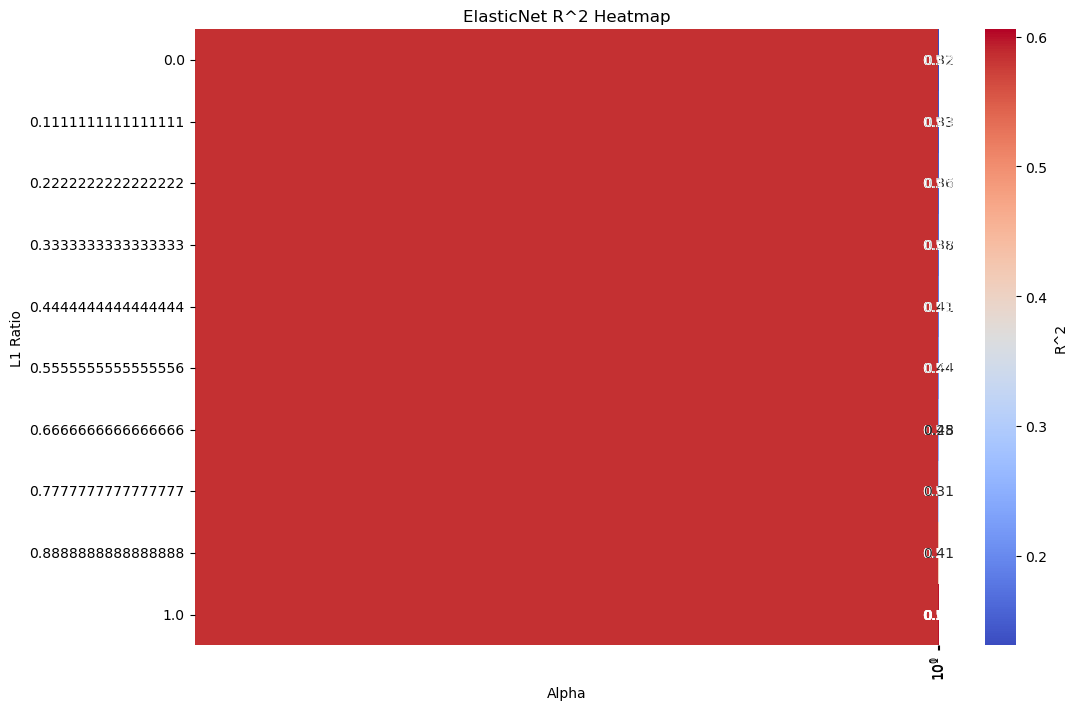

Top-performing configuration:
Alpha: 2.782559402207126, L1 Ratio: 1.0, R^2: 0.6056, MSE: 4979.3557


In [27]:
#1. Regression Models
#Train and evaluate linear regression models to predict cholesterol levels. 
#Elasticnet for cholesterol levels
# Features and target variable
from unittest import result
from matplotlib import pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Drop rows where target variable 'chol' is NaN
df_reg = df.dropna(subset=["chol"])

# Drop target columns for regression
X_reg = df_reg.drop(columns=["chol", "num"])
y_reg = df_reg["chol"]

# One-hot encode categorical variables
X_reg_encoded = pd.get_dummies(X_reg, drop_first=True)

# Impute missing values in features (mean for numeric columns)
imputer = SimpleImputer(strategy="mean")
X_reg_imputed = pd.DataFrame(imputer.fit_transform(X_reg_encoded), columns=X_reg_encoded.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reg_imputed, y_reg, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train ElasticNet model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train_scaled, y_train)
# Predictions
y_pred = elastic_net.predict(X_test_scaled)
# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"ElasticNet R^2: {r2:.4f}")
print(f"ElasticNet MSE: {mse:.4f}")


#Create a heatmap (see documentation for seaborn.heatmap) of R2 and RMSE across a range of alpha and l1_ratio. Use clear labels and a color bar to guide interpretation.
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grid of alpha and l1_ratio values
alpha_values = np.logspace(-4, 1, 10)   
l1_ratio_values = np.linspace(0, 1, 10)
# Initialize lists to store results
results = []
# Loop through alpha and l1_ratio values
for alpha in alpha_values:
    for l1_ratio in l1_ratio_values:
        # Train ElasticNet model
        elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        elastic_net.fit(X_train_scaled, y_train)
        # Predictions
        y_pred = elastic_net.predict(X_test_scaled)
        # Evaluation
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        results.append((alpha, l1_ratio, r2, mse))
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["alpha", "l1_ratio", "R2", "MSE"])
# Pivot the DataFrame for heatmap
heatmap_data = results_df.pivot(index="l1_ratio", columns="alpha", values="R2")
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "R^2"})
plt.title("ElasticNet R^2 Heatmap")
plt.xlabel("Alpha")
plt.ylabel("L1 Ratio")
plt.xscale("log")
plt.show()



# Identify the top-performing configuration based on the evaluation metrics. 
top_performing = results_df.loc[results_df['R2'].idxmax()]
print("Top-performing configuration:")
print(f"Alpha: {top_performing['alpha']}, L1 Ratio: {top_performing['l1_ratio']}, R^2: {top_performing['R2']:.4f}, MSE: {top_performing['MSE']:.4f}")







Logistic Regression Accuracy: 0.5326
Logistic Regression F1 Score (macro): 0.2684
Logistic Regression AUROC (macro): 0.8107
Logistic Regression Mean AUPRC: 0.4238
k-NN Accuracy: 0.5163
k-NN F1 Score (macro): 0.3201
k-NN AUROC (macro): 0.6982
k-NN Mean AUPRC: 0.4196


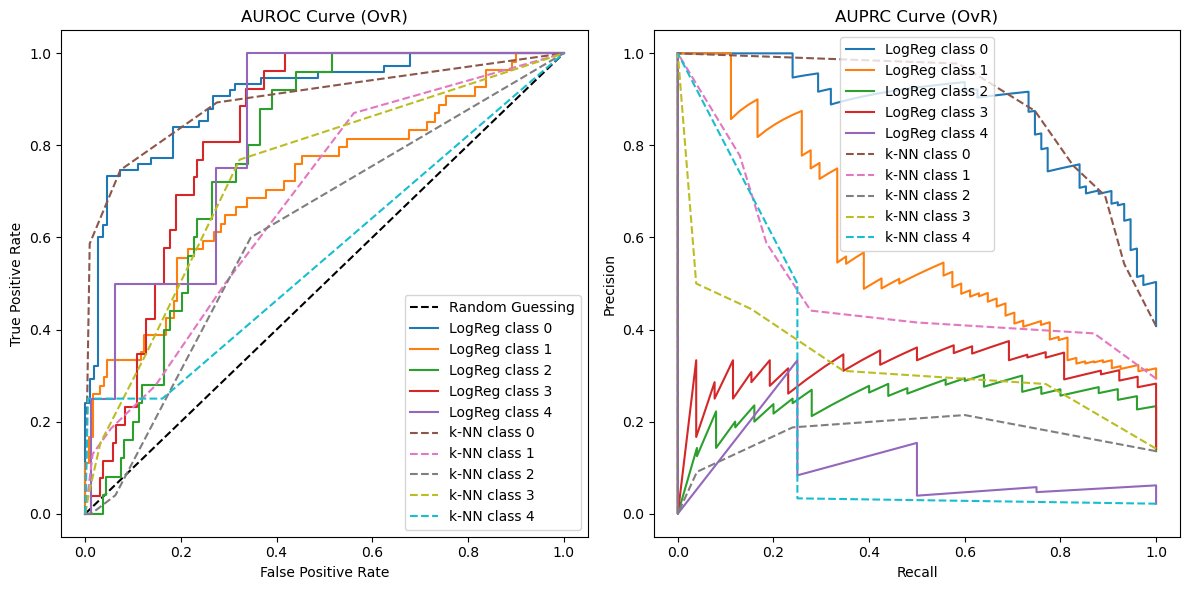

Best model: Logistic Regression
Best model based on AUROC: Logistic Regression with AUROC 0.8107


In [ ]:
# 2.classification models
# Train and evaluate logistic regression and k-NN classifiers to predict heart disease presence as a binary classification task.
# Use accuracy, F1 score, AUROC, and AUPRC as evaluation metrics. 
# 2. For logistic regression: 
# ■ Use LogisticRegression. Experiment with varying parameters 
# (penalty and solver) and observe their effects on model coefficients and performance
# 3. For k-NN: 
# ■ Tune the hyperparameter n_neighbors (e.g., {1, 5, 10}) and compare its 
# impact on evaluation metrics. 
# 4. For both models:  
# ■ Plot AUROC and AUPRC curves for the model’s best configuration.
from optparse import Values
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import (mean_squared_error, r2_score, accuracy_score, 
                             f1_score, roc_auc_score, precision_recall_curve, 
                             roc_curve, auc)
# Prepare data for classification
# Drop rows where target variable 'num' is NaN
df_class = df.dropna(subset=["num"])
# Features and target variable
X_class = df_class.drop(columns=["num", "chol"])
y_class = df_class["num"]
# One-hot encode categorical variables
X_class_encoded = pd.get_dummies(X_class, drop_first=True)
# Impute missing values in features (mean for numeric columns)
imputer_class = SimpleImputer(strategy="mean")
X_class_imputed = pd.DataFrame(imputer_class.fit_transform(X_class_encoded), columns=X_class_encoded.columns)
# Train-test split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class_imputed, y_class, test_size=0.2, random_state=42)
# Standardize
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)
# Logistic Regression
logistic_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
logistic_model.fit(X_train_class_scaled, y_train_class)
# Predictions
y_pred_class = logistic_model.predict(X_test_class_scaled)
# Evaluation metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class, average='macro')
# For multiclass, use 'ovr' (one-vs-rest) for ROC AUC and macro-average for PRC
roc_auc = roc_auc_score(y_test_class, logistic_model.predict_proba(X_test_class_scaled), multi_class='ovr', average='macro')
# Precision-recall curve for each class, then average
precision = dict()
recall = dict()
auprc = dict()
for i in range(len(logistic_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve((y_test_class == logistic_model.classes_[i]).astype(int),
                                                       logistic_model.predict_proba(X_test_class_scaled)[:, i])
    auprc[i] = auc(recall[i], precision[i])
mean_auprc = np.mean(list(auprc.values()))
# Print evaluation metrics
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Logistic Regression F1 Score (macro): {f1:.4f}")
print(f"Logistic Regression AUROC (macro): {roc_auc:.4f}")
print(f"Logistic Regression Mean AUPRC: {mean_auprc:.4f}")
# k-NN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with n_neighbors values
knn_model.fit(X_train_class_scaled, y_train_class)
# Predictions
y_pred_knn = knn_model.predict(X_test_class_scaled)
# Evaluation metrics
accuracy_knn = accuracy_score(y_test_class, y_pred_knn)
f1_knn = f1_score(y_test_class, y_pred_knn, average='macro')
roc_auc_knn = roc_auc_score(y_test_class, knn_model.predict_proba(X_test_class_scaled), multi_class='ovr', average='macro')
precision_knn = dict()
recall_knn = dict()
auprc_knn = dict()
for i in range(len(knn_model.classes_)):
    precision_knn[i], recall_knn[i], _ = precision_recall_curve((y_test_class == knn_model.classes_[i]).astype(int),
                                                                knn_model.predict_proba(X_test_class_scaled)[:, i])
    auprc_knn[i] = auc(recall_knn[i], precision_knn[i])
mean_auprc_knn = np.mean(list(auprc_knn.values()))
print(f"k-NN Accuracy: {accuracy_knn:.4f}")
print(f"k-NN F1 Score (macro): {f1_knn:.4f}")
print(f"k-NN AUROC (macro): {roc_auc_knn:.4f}")
print(f"k-NN Mean AUPRC: {mean_auprc_knn:.4f}")
# Plot AUROC and AUPRC curves for the best configuration (one-vs-rest for each class)
plt.figure(figsize=(12, 6))

# AUROC Curve (one-vs-rest for each class)
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
for i in range(len(logistic_model.classes_)):
    fpr, tpr, _ = roc_curve((y_test_class == logistic_model.classes_[i]).astype(int),
                            logistic_model.predict_proba(X_test_class_scaled)[:, i])
    plt.plot(fpr, tpr, label=f'LogReg class {logistic_model.classes_[i]}')
for i in range(len(knn_model.classes_)):
    fpr, tpr, _ = roc_curve((y_test_class == knn_model.classes_[i]).astype(int),
                            knn_model.predict_proba(X_test_class_scaled)[:, i])
    plt.plot(fpr, tpr, linestyle='--', label=f'k-NN class {knn_model.classes_[i]}')
plt.title('AUROC Curve (OvR)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# AUPRC Curve (one-vs-rest for each class)
plt.subplot(1, 2, 2)
for i in range(len(logistic_model.classes_)):
    plt.plot(recall[i], precision[i], label=f'LogReg class {logistic_model.classes_[i]}')
for i in range(len(knn_model.classes_)):
    plt.plot(recall_knn[i], precision_knn[i], linestyle='--', label=f'k-NN class {knn_model.classes_[i]}')
plt.title('AUPRC Curve (OvR)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.tight_layout()
plt.show()
# Identify the best-performing model based on evaluation metrics 
if roc_auc > roc_auc_knn:
    print("Best model: Logistic Regression")
    best_model = "Logistic Regression"
else:
    print("Best model: k-NN")
    best_model = "k-NN"
print(f"Best model based on AUROC: {best_model} with AUROC {max(roc_auc, roc_auc_knn):.4f}")






